Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


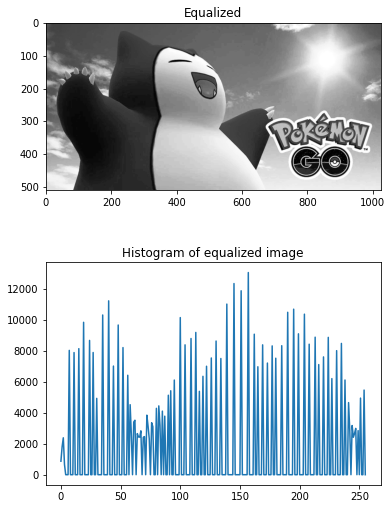

In [17]:
# Import drive from google.colab package
from google.colab import drive
# Import os and sys modules
import os, sys

# Mount Google Drive
drive.mount('/content/drive')
# Assume a folder "images" has been created, go to the folder "images"
os.chdir('/content/drive/My Drive/images')
# Add the path for interpreter to search
sys.path.append('/content/drive/My Drive/images')

# Import all the required libraries
import cv2; import numpy as np
import matplotlib.image as mpimg; import matplotlib.pyplot as plt

img = mpimg.imread('snorlax-low-contrast.png')  # Read the image

# Prepare subplots
fig = plt.figure(figsize=(12,9))
fig.set_figwidth(6); fig.tight_layout()
fig.subplots_adjust(wspace=0.2, hspace=0.2)

# Convert pixel values from [0,1] to [0,255]
grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
grayImgUint = grayImg*255
grayImgUint = grayImgUint.astype(np.uint8)

# Perform histogram equalization
equalizedImg = cv2.equalizeHist(grayImgUint)
ax1 = fig.add_subplot(2, 1, 1); ax1.title.set_text('Equalized')
plt.imshow(equalizedImg, cmap='gray', vmin=0, vmax=255)

# Produce histogram
hist = cv2.calcHist([equalizedImg], [0], None, [256], [0,255])
ax2 = fig.add_subplot(2, 1, 2)
ax2.title.set_text('Histogram of equalized image'); plt.plot(hist)